In [6]:
!ls "data"

ua.base  ua.test


In [7]:
import torch
import pandas as pd
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [8]:
train = pd.read_csv("data/ua.base", sep="\t", names=['user', 'movie', 'rating', 'timestamp'])
test = pd.read_csv("data/ua.test", sep="\t", names=['user', 'movie', 'rating', 'timestamp'])

In [19]:
items = torch.LongTensor(train['movie'])
users = torch.LongTensor(train['user'])
ratings = torch.FloatTensor(train['rating'])

items_test = torch.LongTensor(test['movie'])
users_test = torch.LongTensor(test['user'])
ratings_test = torch.FloatTensor(test['rating'])

In [20]:
rank = 10
numItems = items.max()+1
numUsers = users.max()+1

P = torch.randn(numItems, rank, requires_grad=True)
Q = torch.randn(numUsers, rank, requires_grad=True)

optimizer = torch.optim.Adam([P, Q], lr=0.1)

X = []
Y = []
Y_test = []
for epoch in range(1001):
  hypothesis = torch.sum(P[items] * Q[users], dim=1)
  mse = F.mse_loss(hypothesis, ratings)
    
  optimizer.zero_grad()
  mse.backward()
  optimizer.step()

  with torch.no_grad():
    hypo_test = torch.sum(P[items_test] * Q[users_test], dim=1)
    mse_test = F.mse_loss(hypo_test, ratings_test)
    
    X.append(epoch)
    Y.append(mse.item())
    Y_test.append(mse_test.item())

  if epoch % 100 == 0:
    print(f"epoch: {epoch}, cost:{mse.item():.6f}") 

epoch: 0, cost:23.121899
epoch: 100, cost:0.568130
epoch: 200, cost:0.491611
epoch: 300, cost:0.469063
epoch: 400, cost:0.458631
epoch: 500, cost:0.453258
epoch: 600, cost:0.449875
epoch: 700, cost:0.447527
epoch: 800, cost:0.445814
epoch: 900, cost:0.444507
epoch: 1000, cost:0.443367


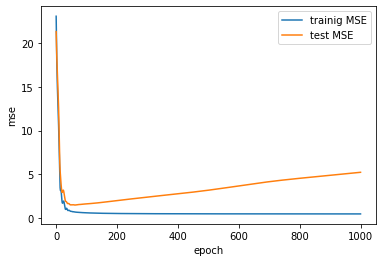

In [21]:
plt.xlabel("epoch")
plt.ylabel("mse")
plt.plot(X, Y, label="trainig MSE")
plt.plot(X, Y_test, label="test MSE")
plt.legend()
plt.show()

In [22]:
rank = 10
numItems = items.max()+1
numUsers = users.max()+1

P = torch.randn(numItems, rank, requires_grad=True)
Q = torch.randn(numUsers, rank, requires_grad=True)

optimizer = torch.optim.Adam([P, Q], lr=0.1)
lambda1 = 0.0001
lambda2 = 0.0001

X = []
Y = []
Y_test = []
for epoch in range(1001):
  hypothesis = torch.sum(P[items] * Q[users], dim=1)
  mse = F.mse_loss(hypothesis, ratings)
  cost = mse + lambda1 * (P ** 2).sum() + lambda2 * (Q ** 2).sum()
    
  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  with torch.no_grad():
    hypo_test = torch.sum(P[items_test] * Q[users_test], dim=1)
    mse_test = F.mse_loss(hypo_test, ratings_test)
    
    X.append(epoch)
    Y.append(mse.item())
    Y_test.append(mse_test.item())

  if epoch % 100 == 0:
    print(f"epoch: {epoch}, cost:{mse.item():.6f}") 

epoch: 0, cost:23.465286
epoch: 100, cost:0.705484
epoch: 200, cost:0.644208
epoch: 300, cost:0.632140
epoch: 400, cost:0.628717
epoch: 500, cost:0.627718
epoch: 600, cost:0.627355
epoch: 700, cost:0.627173
epoch: 800, cost:0.627032
epoch: 900, cost:0.626885
epoch: 1000, cost:0.626706


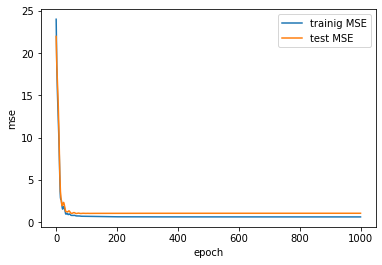

In [18]:
plt.xlabel("epoch")
plt.ylabel("mse")
plt.plot(X, Y, label="trainig MSE")
plt.plot(X, Y_test, label="test MSE")
plt.legend()
plt.show()

In [23]:
rank = 10
numItems = items.max()+1
numUsers = users.max()+1

P = torch.randn(numItems, rank, requires_grad=True)
Q = torch.randn(numUsers, rank, requires_grad=True)
bias_user = torch.randn(numUsers, requires_grad=True)
bias_item = torch.randn(numItems, requires_grad=True)
mean = ratings.sum()/len(ratings)

optimizer = torch.optim.Adam([P, Q], lr=0.1)

lambda1 = 0.0001
lambda2 = 0.0001
lambda3 = 0.001
lambda4 = 0.001

X = []
Y = []
Y_test = []
for epoch in range(1001):
  hypothesis = torch.sum(P[items] * Q[users], dim=1) + mean +\
    bias_item[items] + bias_user[users]
  mse = F.mse_loss(hypothesis, ratings)
  cost = mse + lambda1 * (P ** 2).sum() + lambda2 * (Q ** 2).sum() +\
    lambda3 * (bias_item ** 2).sum() + lambda4 * (bias_user ** 2).sum()
    
  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  with torch.no_grad():
    hypo_test = torch.sum(P[items_test] * Q[users_test], dim=1) + mean +\
      bias_item[items_test] + bias_user[users_test]
    mse_test = F.mse_loss(hypo_test, ratings_test)
    
    X.append(epoch)
    Y.append(mse.item())
    Y_test.append(mse_test.item())

  if epoch % 100 == 0:
    print(f"epoch: {epoch}, cost:{mse.item():.6f}") 

epoch: 0, cost:13.264574
epoch: 100, cost:0.674353
epoch: 200, cost:0.640875
epoch: 300, cost:0.636680
epoch: 400, cost:0.635616
epoch: 500, cost:0.635153
epoch: 600, cost:0.634990
epoch: 700, cost:0.634962
epoch: 800, cost:0.634990
epoch: 900, cost:0.635030
epoch: 1000, cost:0.635062


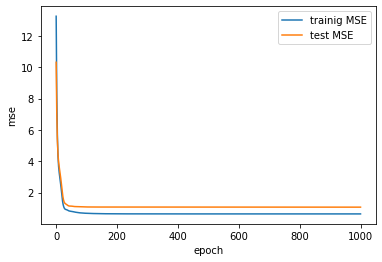

In [24]:
plt.xlabel("epoch")
plt.ylabel("mse")
plt.plot(X, Y, label="trainig MSE")
plt.plot(X, Y_test, label="test MSE")
plt.legend()
plt.show()

In [25]:
rank = 100
numItems = items.max()+1
numUsers = users.max()+1

P = torch.randn(numItems, rank, requires_grad=True)
Q = torch.randn(numUsers, rank, requires_grad=True)
bias_user = torch.randn(numUsers, requires_grad=True)
bias_item = torch.randn(numItems, requires_grad=True)
mean = ratings.sum()/len(ratings)

optimizer = torch.optim.Adam([P, Q], lr=0.1)

lambda1 = 0.00001
lambda2 = 0.00001
lambda3 = 0.0001
lambda4 = 0.0001

X = []
Y = []
Y_test = []
for epoch in range(1001):
  hypothesis = torch.sum(P[items] * Q[users], dim=1) + mean +\
    bias_item[items] + bias_user[users]
  mse = F.mse_loss(hypothesis, ratings)
  cost = mse + lambda1 * (P ** 2).sum() + lambda2 * (Q ** 2).sum() +\
    lambda3 * (bias_item ** 2).sum() + lambda4 * (bias_user ** 2).sum()
    
  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  with torch.no_grad():
    hypo_test = torch.sum(P[items_test] * Q[users_test], dim=1) + mean +\
      bias_item[items_test] + bias_user[users_test]
    mse_test = F.mse_loss(hypo_test, ratings_test)
    
    X.append(epoch)
    Y.append(mse.item())
    Y_test.append(mse_test.item())

  if epoch % 100 == 0:
    print(f"epoch: {epoch}, cost:{mse.item():.6f}") 

epoch: 0, cost:104.981728
epoch: 100, cost:0.065153
epoch: 200, cost:0.021232
epoch: 300, cost:0.012111
epoch: 400, cost:0.009074
epoch: 500, cost:0.007787
epoch: 600, cost:0.007132
epoch: 700, cost:0.006728
epoch: 800, cost:0.006446
epoch: 900, cost:0.006240
epoch: 1000, cost:0.006082


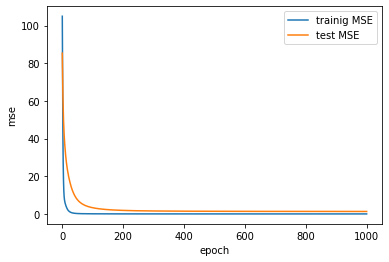

In [26]:
plt.xlabel("epoch")
plt.ylabel("mse")
plt.plot(X, Y, label="trainig MSE")
plt.plot(X, Y_test, label="test MSE")
plt.legend()
plt.show()